### Denne notatboken lager tidsserier for mooring M og beregner forskjellige statistiske identiteter mellom Norkyst-modellverdiene og observasjonene.
### Det samme utføøres for South Cape-fortøyningen og Barents-modellen lenger ned.

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import gsw

In [3]:
# Funksjon for å laste inn og filtrere data basert på dybde
def load_and_filter_data(base_directories, depths):
    all_data = {depth: [] for depth in depths}
    
    # Base directories tar inn mappene som man ønsker å gå igjennom
    for base_directory in base_directories:
        # Tar in hver fil i den gitte mappa
        for file in os.listdir(base_directory):
            # Tar bare filene som er csv filer og leser de om til et dataset
            if file.endswith('.csv'):
                file_path = os.path.join(base_directory, file)
                data = pd.read_csv(file_path)
                # For hvert dyp som er øsnket legger man så inn dybden i dataramma
                for depth in depths:
                    filtered_data = data[data['DEPTH'] == depth]
                    all_data[depth].append(filtered_data)
    
    # Slå sammen dataene for hver dybde fra alle månedene
    for depth in depths:
        all_data[depth] = pd.concat(all_data[depth], ignore_index=True)
    
    return all_data

In [4]:
base_directories = [
    '/home/sagjo8396/NorEMSO/example_notebooks/StaM_Dep1_files',
    '/home/sagjo8396/NorEMSO/example_notebooks/StaM_Dep2_files',
    '/home/sagjo8396/NorEMSO/example_notebooks/StaM_Dep3_files'
]

In [5]:
# Dyp av interesse
depths = [500, 800, 1000, 1200, 2000]

# Laste inn og filtrere data
filtered_data = load_and_filter_data(base_directories, depths)

In [6]:
data_500m = filtered_data[500]
data_800m = filtered_data[800]
data_1000m = filtered_data[1000]
data_1200m = filtered_data[1200]
data_2000m = filtered_data[2000]

In [7]:
def apply_qc_filter(data, qc_column, value_column, qc_min=0, qc_max=3):
    return np.where((data[qc_column] > qc_min) & (data[qc_column] < qc_max), data[value_column], np.nan)

data_500m["PSAL_FILTER"] = apply_qc_filter(data_500m, "PSAL_QC", "PSAL",qc_min=0, qc_max=3)
data_500m["TEMP_FILTER"] = apply_qc_filter(data_500m, "TEMP_QC", "TEMP",qc_min=0, qc_max=3)
data_800m["PSAL_FILTER"] = apply_qc_filter(data_800m, "PSAL_QC", "PSAL",qc_min=0, qc_max=3)
data_800m["TEMP_FILTER"] = apply_qc_filter(data_800m, "TEMP_QC", "TEMP",qc_min=0, qc_max=3)
data_1000m["PSAL_FILTER"] = apply_qc_filter(data_1000m, "PSAL_QC", "PSAL",qc_min=0, qc_max=3)
data_1000m["TEMP_FILTER"] = apply_qc_filter(data_1000m, "TEMP_QC", "TEMP",qc_min=0, qc_max=3)
data_1200m["PSAL_FILTER"] = apply_qc_filter(data_1200m, "PSAL_QC", "PSAL",qc_min=0, qc_max=3)
data_1200m["TEMP_FILTER"] = apply_qc_filter(data_1200m, "TEMP_QC", "TEMP",qc_min=0, qc_max=3)
data_2000m["PSAL_FILTER"] = apply_qc_filter(data_2000m, "PSAL_QC", "PSAL",qc_min=0, qc_max=3)
data_2000m["TEMP_FILTER"] = apply_qc_filter(data_2000m, "TEMP_QC", "TEMP",qc_min=0, qc_max=3)

In [8]:
# Konverter tidspunktene til datetime-objekter og sorter dataene kronologisk
data_500m["TIME"] = pd.to_datetime(data_500m["TIME"])
data_500m = data_500m.sort_values(by="TIME")

data_800m["TIME"] = pd.to_datetime(data_800m["TIME"])
data_800m = data_800m.sort_values(by="TIME")

data_1000m["TIME"] = pd.to_datetime(data_1000m["TIME"])
data_1000m = data_1000m.sort_values(by="TIME")

data_1200m["TIME"] = pd.to_datetime(data_1200m["TIME"])
data_1200m = data_1200m.sort_values(by="TIME")

data_2000m["TIME"] = pd.to_datetime(data_2000m["TIME"])
data_2000m = data_2000m.sort_values(by="TIME")

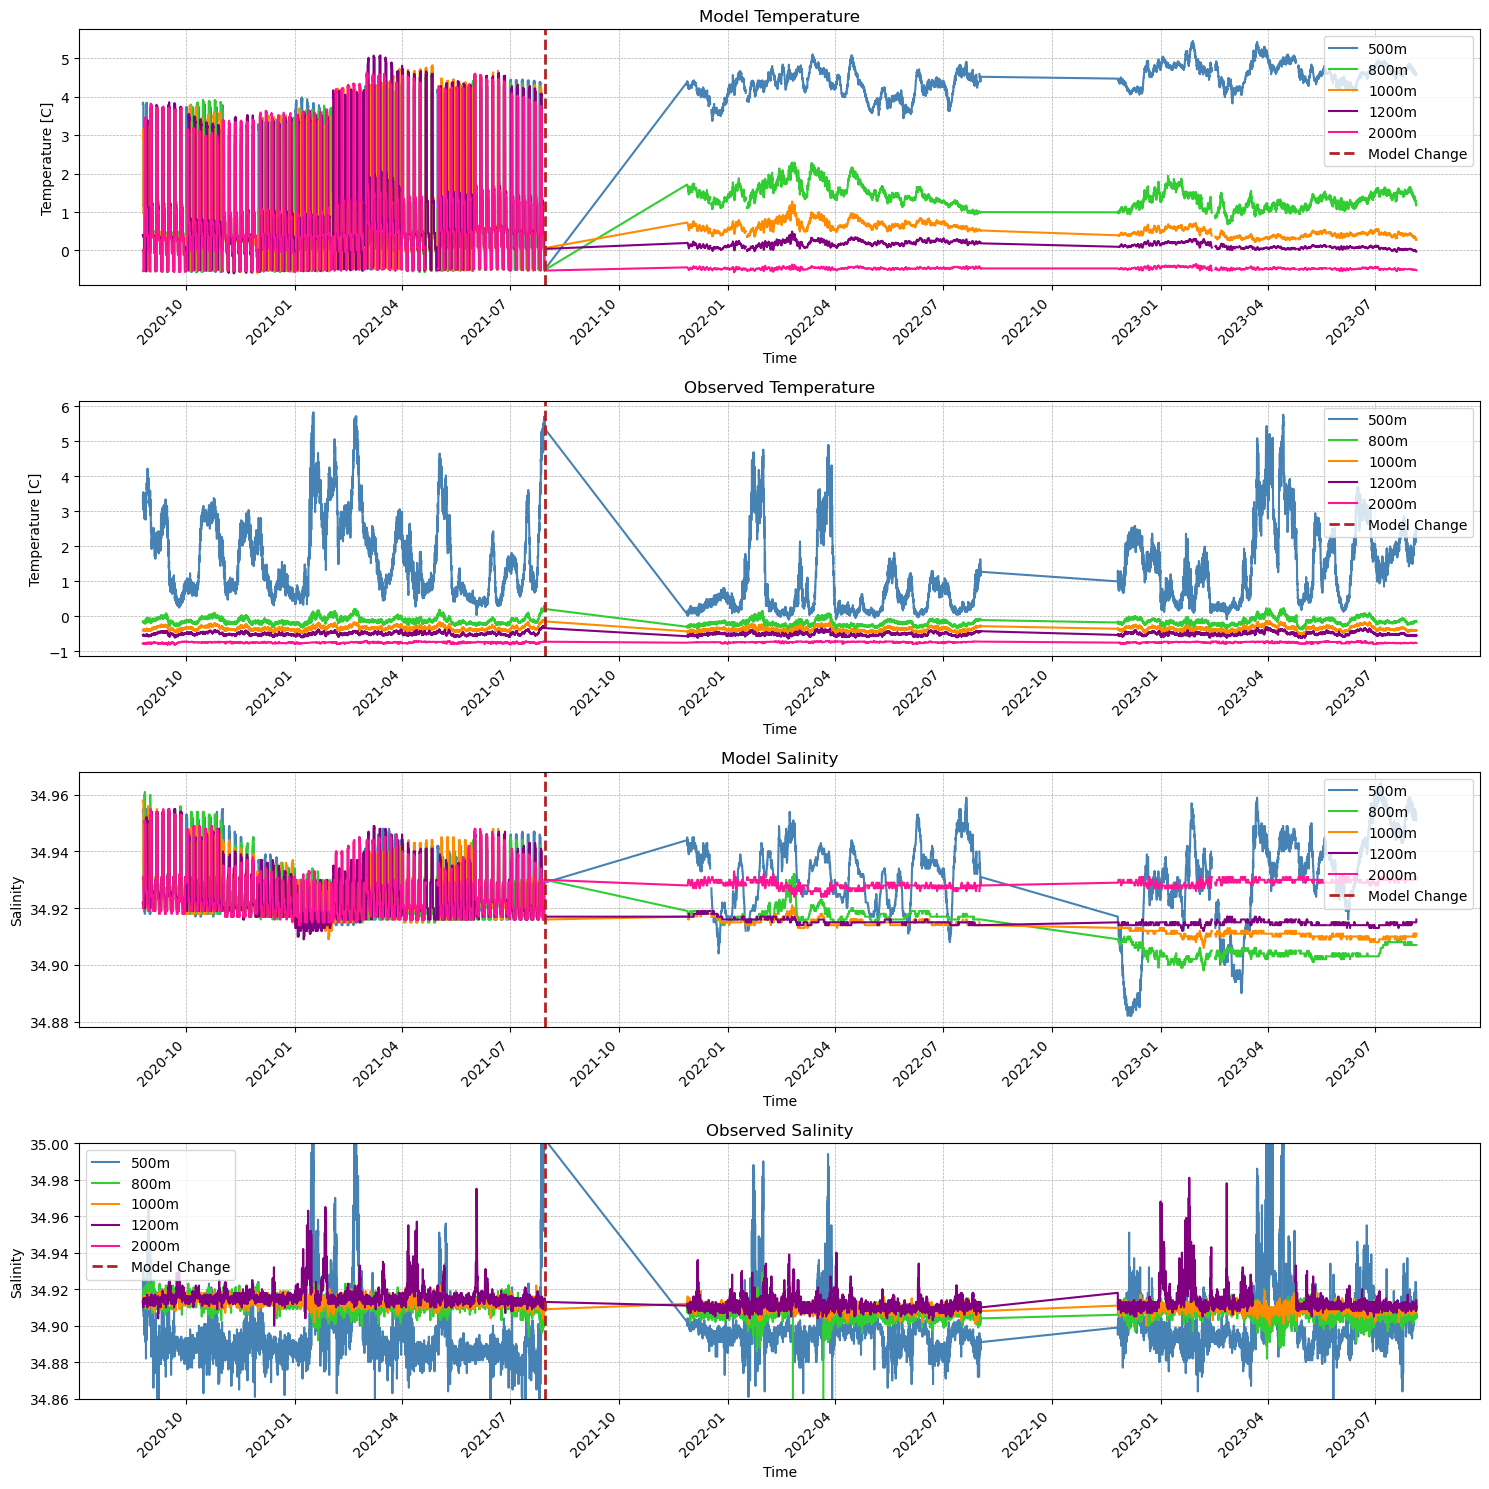

In [9]:

# Bruk tidspunktene fra data_500m for x-aksen (antas å være lik for alle dybder)
time_data = data_500m["TIME"]

# Opprett plottet
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(15, 15))

# Temperatur modell
axs[0].plot(time_data, data_500m["TEMP_MOD"], label="500m", color='SteelBlue')
axs[0].plot(time_data, data_800m["TEMP_MOD"], label="800m", color='LimeGreen')
axs[0].plot(time_data, data_1000m["TEMP_MOD"], label="1000m", color='DarkOrange')
axs[0].plot(time_data, data_1200m["TEMP_MOD"], label="1200m", color='Purple')
axs[0].plot(time_data, data_2000m["TEMP_MOD"], label="2000m", color='DeepPink')
axs[0].axvline(x=time_data.iloc[8139], color='FireBrick', linewidth=2, linestyle='--', label='Model Change')
axs[0].set_title("Model Temperature")
axs[0].set_xlabel("Time")
axs[0].set_ylabel("Temperature [C]")
axs[0].legend()
axs[0].grid(True, which='both', linestyle='--', linewidth=0.5)

# Temperatur observasjoner
axs[1].plot(time_data, data_500m["TEMP_FILTER"], label="500m", color='SteelBlue')
axs[1].plot(time_data, data_800m["TEMP_FILTER"], label="800m", color='LimeGreen')
axs[1].plot(time_data, data_1000m["TEMP_FILTER"], label="1000m", color='DarkOrange')
axs[1].plot(time_data, data_1200m["TEMP_FILTER"], label="1200m", color='Purple')
axs[1].plot(time_data, data_2000m["TEMP_FILTER"], label="2000m", color='DeepPink')
axs[1].axvline(x=time_data.iloc[8139], color='FireBrick', linewidth=2, linestyle='--', label='Model Change')
axs[1].set_title("Observed Temperature")
axs[1].set_xlabel("Time")
axs[1].set_ylabel("Temperature [C]")
axs[1].legend()
axs[1].grid(True, which='both', linestyle='--', linewidth=0.5)

# Salinitet modell
axs[2].plot(time_data, data_500m["SALT_MOD"], label="500m", color='SteelBlue')
axs[2].plot(time_data, data_800m["SALT_MOD"], label="800m", color='LimeGreen')
axs[2].plot(time_data, data_1000m["SALT_MOD"], label="1000m", color='DarkOrange')
axs[2].plot(time_data, data_1200m["SALT_MOD"], label="1200m", color='Purple')
axs[2].plot(time_data, data_2000m["SALT_MOD"], label="2000m", color='DeepPink')
axs[2].axvline(x=time_data.iloc[8139], color='FireBrick', linewidth=2, linestyle='--', label='Model Change')
axs[2].set_title("Model Salinity")
axs[2].set_xlabel("Time")
axs[2].set_ylabel("Salinity")
axs[2].legend()
axs[2].grid(True, which='both', linestyle='--', linewidth=0.5)

# Salinitet observasjoner
axs[3].plot(time_data, data_500m["PSAL_FILTER"], label="500m", color='SteelBlue')
axs[3].plot(time_data, data_800m["PSAL_FILTER"], label="800m", color='LimeGreen')
axs[3].plot(time_data, data_1000m["PSAL_FILTER"], label="1000m", color='DarkOrange')
axs[3].plot(time_data, data_1200m["PSAL_FILTER"], label="1200m", color='Purple')
axs[3].plot(time_data, data_2000m["PSAL_FILTER"], label="2000m", color='DeepPink')
axs[3].axvline(x=time_data.iloc[8139], color='FireBrick', linewidth=2, linestyle='--', label='Model Change')
axs[3].set_title("Observed Salinity")
axs[3].set_xlabel("Time")
axs[3].set_ylabel("Salinity")
axs[3].set_ylim(34.86, 35)
axs[3].legend()
axs[3].grid(True, which='both', linestyle='--', linewidth=0.5)

# Formater x-aksen til å vise datoer kronologisk og med et bestemt intervall
for ax in axs:
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Viser hver tredje måned
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Formatterer datoene som ÅÅÅÅ-MM
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right")  # Roter datoene for bedre lesbarhet

# Juster layout
plt.tight_layout()

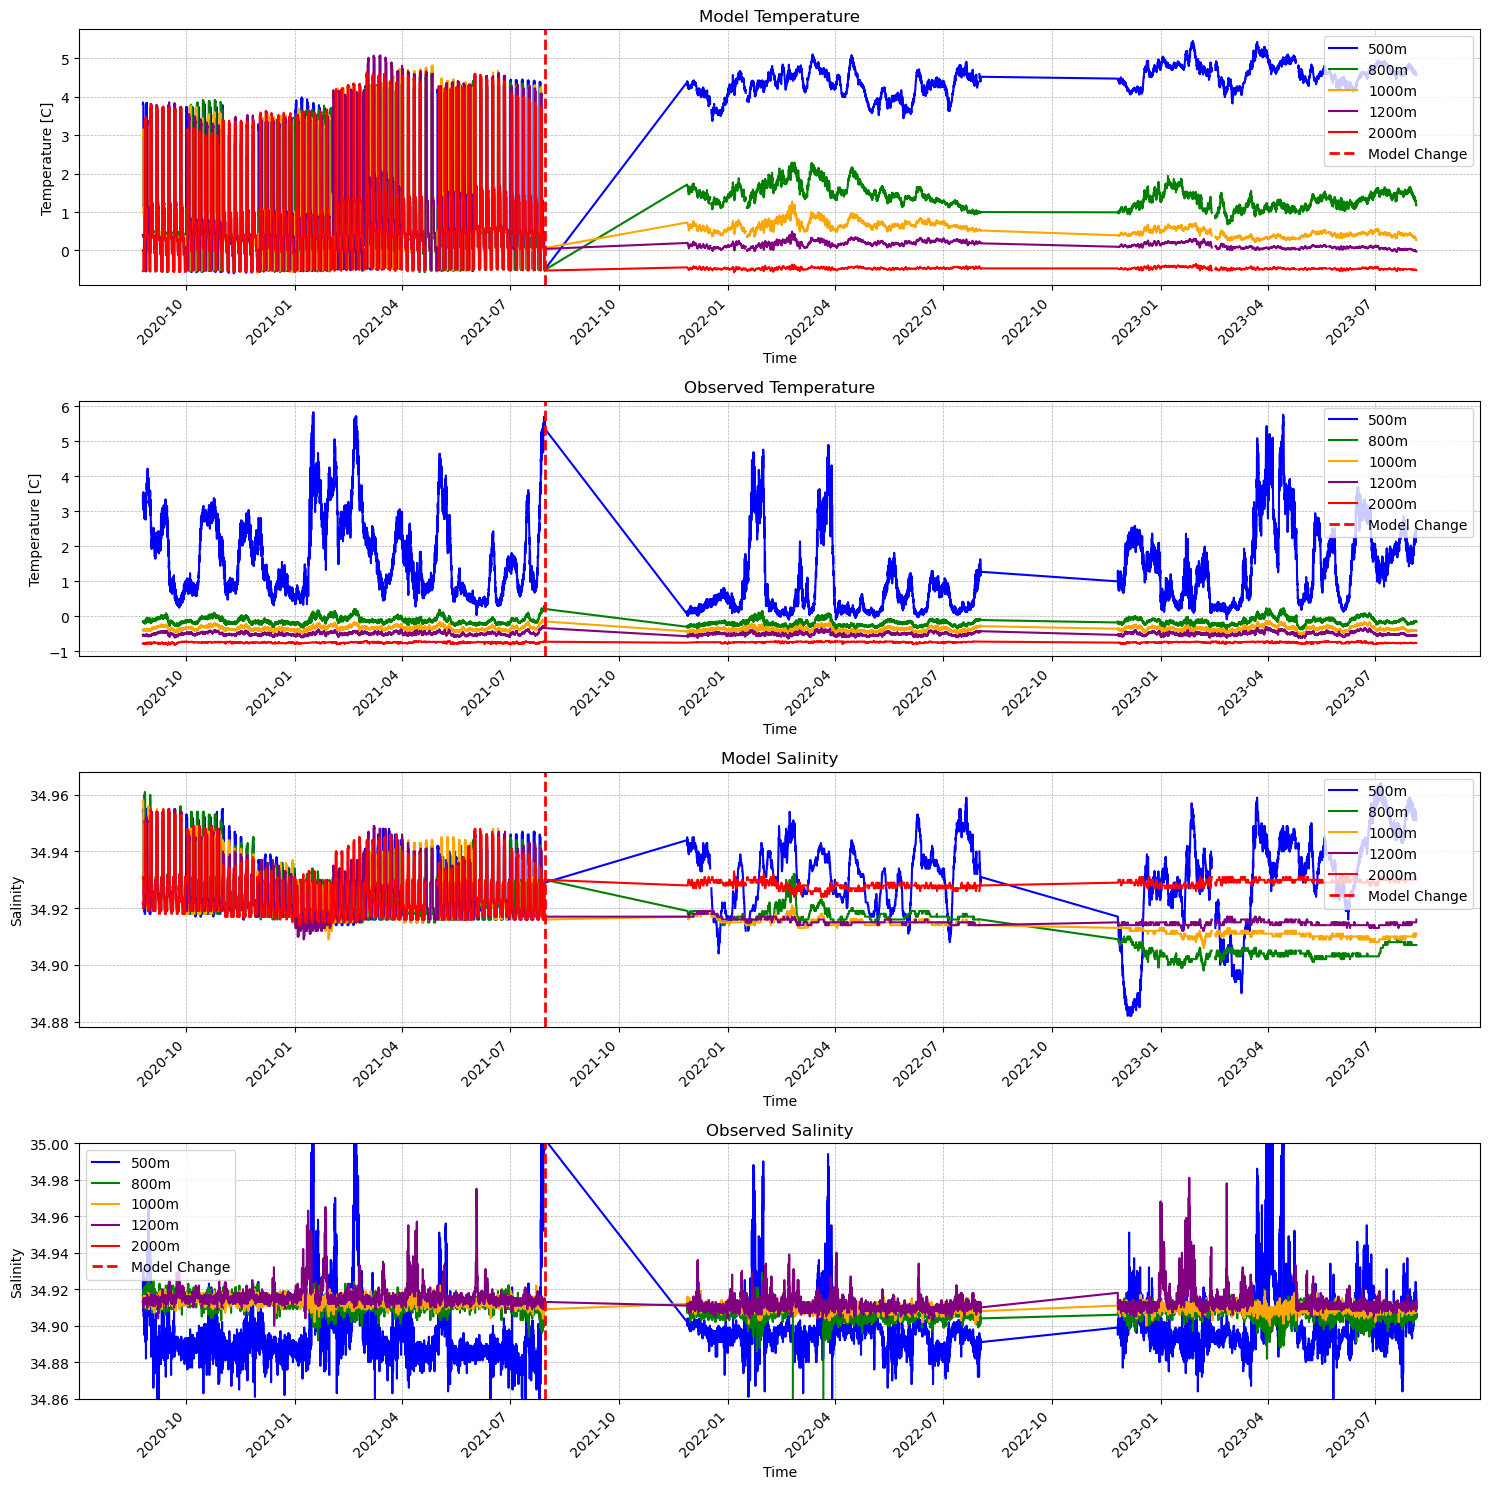

In [10]:
# Opprett plottet
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(15, 15))

# Definer enkle farger
colors = ['blue', 'green', 'orange', 'purple', 'red']

# Temperatur modell
axs[0].plot(time_data, data_500m["TEMP_MOD"], label="500m", color=colors[0])
axs[0].plot(time_data, data_800m["TEMP_MOD"], label="800m", color=colors[1])
axs[0].plot(time_data, data_1000m["TEMP_MOD"], label="1000m", color=colors[2])
axs[0].plot(time_data, data_1200m["TEMP_MOD"], label="1200m", color=colors[3])
axs[0].plot(time_data, data_2000m["TEMP_MOD"], label="2000m", color=colors[4])
axs[0].axvline(x=time_data.iloc[8139], color='red', linewidth=2, linestyle='--', label='Model Change')
axs[0].set_title("Model Temperature")
axs[0].set_xlabel("Time")
axs[0].set_ylabel("Temperature [C]")
axs[0].legend()
axs[0].grid(True, which='both', linestyle='--', linewidth=0.5)

# Temperatur observasjoner
axs[1].plot(time_data, data_500m["TEMP_FILTER"], label="500m", color=colors[0])
axs[1].plot(time_data, data_800m["TEMP_FILTER"], label="800m", color=colors[1])
axs[1].plot(time_data, data_1000m["TEMP_FILTER"], label="1000m", color=colors[2])
axs[1].plot(time_data, data_1200m["TEMP_FILTER"], label="1200m", color=colors[3])
axs[1].plot(time_data, data_2000m["TEMP_FILTER"], label="2000m", color=colors[4])
axs[1].axvline(x=time_data.iloc[8139], color='red', linewidth=2, linestyle='--', label='Model Change')
axs[1].set_title("Observed Temperature")
axs[1].set_xlabel("Time")
axs[1].set_ylabel("Temperature [C]")
axs[1].legend()
axs[1].grid(True, which='both', linestyle='--', linewidth=0.5)

# Salinitet modell
axs[2].plot(time_data, data_500m["SALT_MOD"], label="500m", color=colors[0])
axs[2].plot(time_data, data_800m["SALT_MOD"], label="800m", color=colors[1])
axs[2].plot(time_data, data_1000m["SALT_MOD"], label="1000m", color=colors[2])
axs[2].plot(time_data, data_1200m["SALT_MOD"], label="1200m", color=colors[3])
axs[2].plot(time_data, data_2000m["SALT_MOD"], label="2000m", color=colors[4])
axs[2].axvline(x=time_data.iloc[8139], color='red', linewidth=2, linestyle='--', label='Model Change')
axs[2].set_title("Model Salinity")
axs[2].set_xlabel("Time")
axs[2].set_ylabel("Salinity")
axs[2].legend()
axs[2].grid(True, which='both', linestyle='--', linewidth=0.5)

# Salinitet observasjoner
axs[3].plot(time_data, data_500m["PSAL_FILTER"], label="500m", color=colors[0])
axs[3].plot(time_data, data_800m["PSAL_FILTER"], label="800m", color=colors[1])
axs[3].plot(time_data, data_1000m["PSAL_FILTER"], label="1000m", color=colors[2])
axs[3].plot(time_data, data_1200m["PSAL_FILTER"], label="1200m", color=colors[3])
axs[3].plot(time_data, data_2000m["PSAL_FILTER"], label="2000m", color=colors[4])
axs[3].axvline(x=time_data.iloc[8139], color='red', linewidth=2, linestyle='--', label='Model Change')
axs[3].set_title("Observed Salinity")
axs[3].set_xlabel("Time")
axs[3].set_ylabel("Salinity")
axs[3].set_ylim(34.86, 35)
axs[3].legend()
axs[3].grid(True, which='both', linestyle='--', linewidth=0.5)

# Formater x-aksen til å vise datoer kronologisk og med et bestemt intervall
for ax in axs:
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Viser hver tredje måned
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Formatterer datoene som ÅÅÅÅ-MM
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right")  # Roter datoene for bedre lesbarhet

# Juster layout
plt.tight_layout()

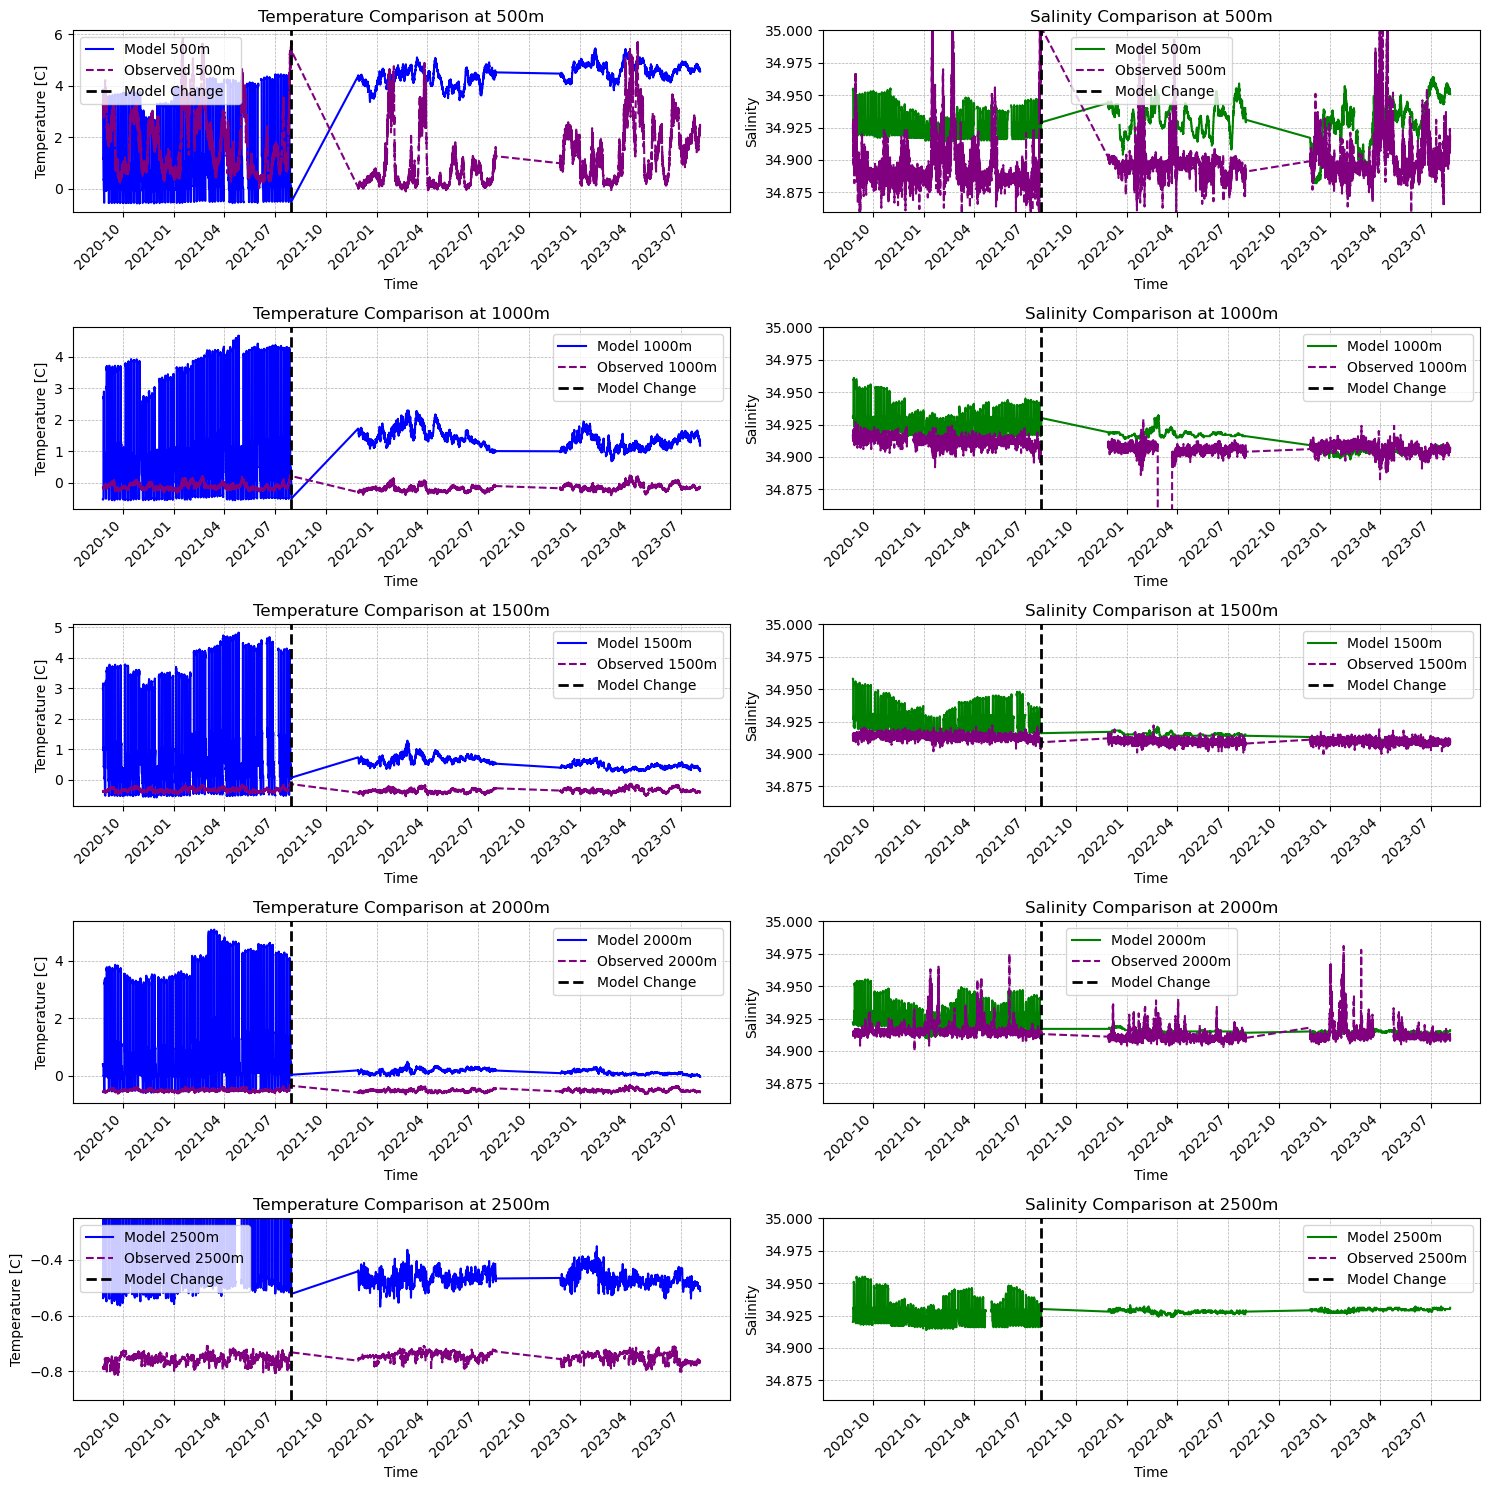

In [11]:
# Opprett plottet
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Definer farger
model_color_temp    = 'blue'
obs_color_temp      = 'red'
model_color_sal     = 'green'
obs_color_sal       = 'purple'

# DataFrame liste for enklere iterasjon
data_frames = [data_500m, data_800m, data_1000m, data_1200m, data_2000m]

# Plott hver dybde for temperatur og salinitet
for i, data in enumerate(data_frames):
    # Temperatur
    axs[i, 0].plot(time_data, data["TEMP_MOD"], label=f"Model {i*500+500}m", color=model_color_temp)
    axs[i, 0].plot(time_data, data["TEMP_FILTER"], label=f"Observed {i*500+500}m", linestyle='--', color=obs_color_sal)
    
    axs[i, 0].axvline(x=time_data.iloc[8139], color='black', linewidth=2, linestyle='--', label='Model Change')
    axs[i, 0].set_title(f"Temperature Comparison at {i*500+500}m")
    axs[i, 0].set_xlabel("Time")
    axs[i, 0].set_ylabel("Temperature [C]")
    axs[i, 0].legend()
    axs[i, 0].grid(True, which='both', linestyle='--', linewidth=0.5)

    # Salinitet
    axs[i, 1].plot(time_data, data["SALT_MOD"], label=f"Model {i*500+500}m", color=model_color_sal)
    axs[i, 1].plot(time_data, data["PSAL_FILTER"], label=f"Observed {i*500+500}m", linestyle='--', color=obs_color_sal)
    
    axs[i, 1].axvline(x=time_data.iloc[8139], color='black', linewidth=2, linestyle='--', label='Model Change')
    axs[i, 1].set_title(f"Salinity Comparison at {i*500+500}m")
    axs[i, 1].set_xlabel("Time")
    axs[i, 1].set_ylabel("Salinity")
    axs[i, 1].legend()
    axs[i, 1].grid(True, which='both', linestyle='--', linewidth=0.5)
    axs[i, 1].set_ylim(34.86, 35)

# Formater x-aksen til å vise datoer kronologisk og med et bestemt intervall
for ax in axs.flat:
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Viser hver tredje måned
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Formatterer datoene som ÅÅÅÅ-MM
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right")  # Roter datoene for bedre lesbarhet

axs[-1,-2].set_ylim(np.min(data["TEMP_FILTER"].loc[8140::])-0.1, np.max(data["TEMP_MOD"].loc[8140::])+0.1)
#axs[3,1].set_ylim(np.min(data["TEMP_FILTER"].loc[8140::])-0.1, np.max(data["TEMP_MOD"].loc[8140::])+0.1)
# Juster layout
plt.tight_layout()


In [12]:
data_800m.shape

(20128, 16)

In [13]:
# Finner forskjellen i temp data mellom observasjoner og modellen før og etter endring i model
# Temp 500m
diff_500_temp_before =  data_500m["TEMP_FILTER"].loc[0:8139]-data_500m["TEMP_MOD"].loc[0:8139]
diff_500_temp_after =   data_500m["TEMP_FILTER"].loc[8140::]-data_500m["TEMP_MOD"].loc[8140::]

# Temp 800m
diff_800_temp_before =  data_800m["TEMP_FILTER"].loc[0:8139]-data_800m["TEMP_MOD"].loc[0:8139]
diff_800_temp_after =   data_800m["TEMP_FILTER"].loc[8140::]-data_800m["TEMP_MOD"].loc[8140::]


# Temp 1000m
diff_1000_temp_before = data_1000m["TEMP_FILTER"].loc[0:8139] - data_1000m["TEMP_MOD"].loc[0:8139]
diff_1000_temp_after = data_1000m["TEMP_FILTER"].loc[8140::] - data_1000m["TEMP_MOD"].loc[8140::]

# Temp 1200m
diff_1200_temp_before = data_1200m["TEMP_FILTER"].loc[0:8139] - data_1200m["TEMP_MOD"].loc[0:8139]
diff_1200_temp_after = data_1200m["TEMP_FILTER"].loc[8140::] - data_1200m["TEMP_MOD"].loc[8140::]

# Temp 2000m
diff_2000_temp_before =  data_2000m["TEMP_FILTER"].loc[0:8139]-data_2000m["TEMP_MOD"].loc[0:8139]
diff_2000_temp_after =   data_2000m["TEMP_FILTER"].loc[8140::]-data_2000m["TEMP_MOD"].loc[8140::]



In [90]:
før_500 = data_500m["TEMP_FILTER"].loc[0:8139].corr(data_500m["TEMP_MOD"].loc[0:8139])
etter_500 = data_500m["TEMP_FILTER"].loc[8140::].corr(data_500m["TEMP_MOD"].loc[8140::])

print(før_500 )
print(etter_500)

-0.001482174240543941
0.3368926402568161


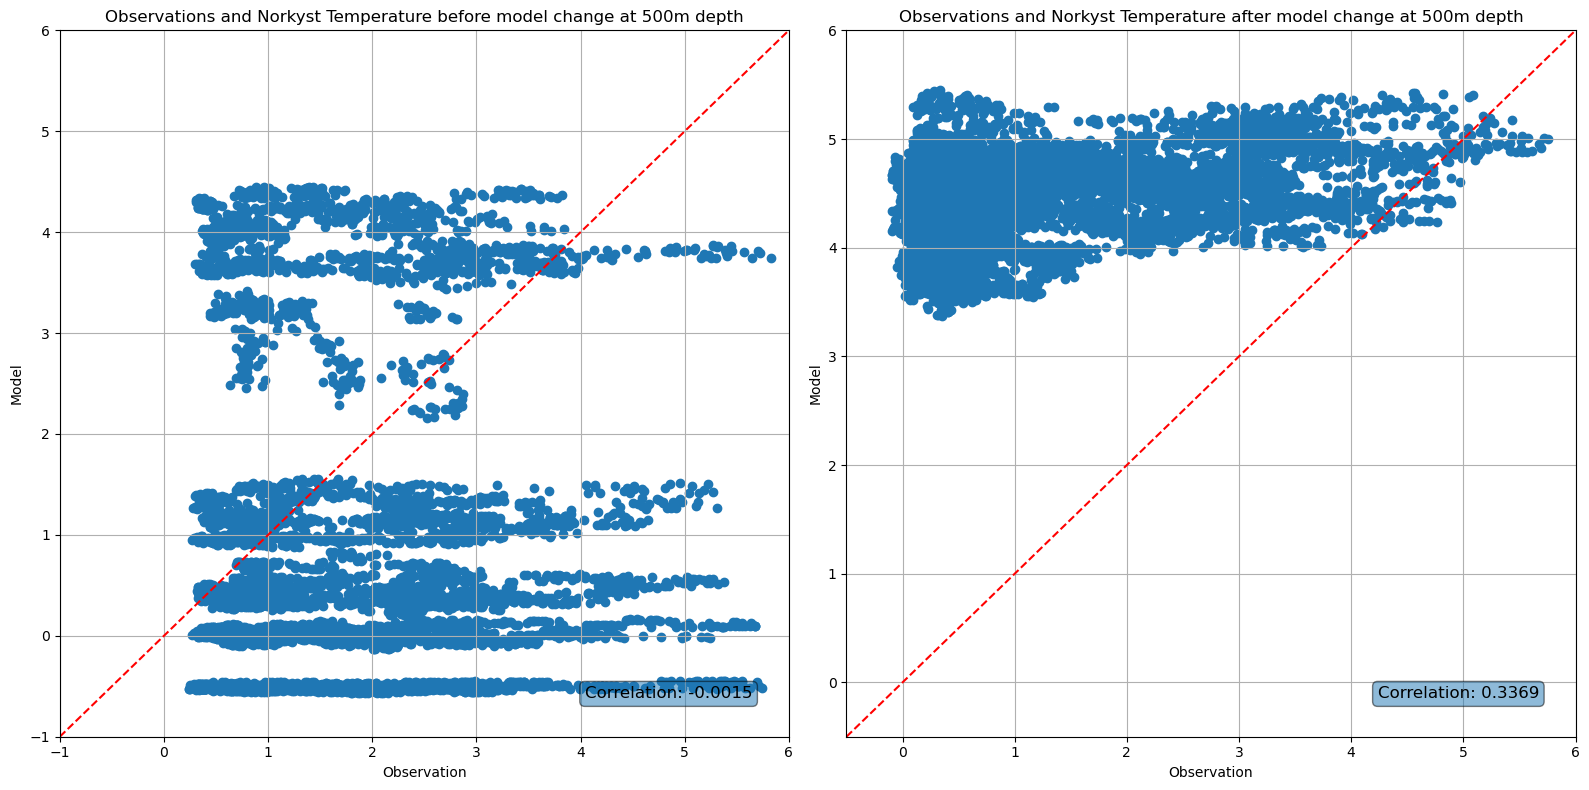

In [100]:


fig, axs = plt.subplots(1, 2, figsize=(16, 8))  # 1 rad, 2 kolonner

# Første subplot
axs[0].scatter(data_500m["TEMP_FILTER"].loc[0:8139], data_500m["TEMP_MOD"].loc[0:8139])
axs[0].set_ylabel("Model")
axs[0].set_xlabel("Observation")
axs[0].set_xlim((-1,6))
axs[0].set_ylim((-1,6))
axs[0].grid(True)
axs[0].set_title("Observations and Norkyst Temperature before model change at 500m depth")

lims1 = [-1, 6]
axs[0].plot(lims1, lims1, 'r--')  # rød stiplet linje


axs[0].text(0.95, 0.05, f'Correlation: {før_500:.4f}', transform=axs[0].transAxes,
            fontsize=12, horizontalalignment='right', verticalalignment='bottom',
            bbox=dict(boxstyle='round', alpha=0.5, edgecolor='black'))

# Andre subplot
axs[1].scatter(data_500m["TEMP_FILTER"].loc[8140::], data_500m["TEMP_MOD"].loc[8140::])
axs[1].set_ylabel("Model")
axs[1].set_xlabel("Observation")
axs[1].set_xlim((-0.5,6))
axs[1].set_ylim((-0.5,6))
axs[1].grid(True)
axs[1].set_title("Observations and Norkyst Temperature after model change at 500m depth")

lims2 = [-0.5, 6]
axs[1].plot(lims2, lims2, 'r--')  # rød stiplet linje


axs[1].text(0.95, 0.05, f'Correlation: {etter_500:.4f}', transform=axs[1].transAxes,
            fontsize=12, horizontalalignment='right', verticalalignment='bottom',
            bbox=dict(boxstyle='round', alpha=0.5, edgecolor='black'))

plt.tight_layout()  # Juster layout for å unngå overlapping
plt.show()

In [111]:
før_500 = np.corrcoef(data_500m["TEMP_FILTER"].loc[0:8139], data_500m["TEMP_MOD"].loc[0:8139])
etter_500 = np.corrcoef(data_500m["TEMP_FILTER"].loc[8140::], data_500m["TEMP_MOD"].loc[8140::])
data_500m.head()

,DEPTH,TIME,TEMP,TEMP_QC,PSAL,PSAL_QC,LON,LAT,X,Y,DAY,year_month,TEMP_MOD,SALT_MOD,PSAL_FILTER,TEMP_FILTER
0,500.0,2020-08-25 12:00:00,3.439,1.0,34.928,1.0,2.203,65.829,400,333,2020-08-25,2020-08,3.811,34.954,34.928,3.439
1,500.0,2020-08-25 13:00:00,3.246,1.0,34.923,1.0,2.203,65.829,400,333,2020-08-25,2020-08,3.832,34.955,34.923,3.246
2,500.0,2020-08-25 14:00:00,3.310,1.0,34.927,1.0,2.203,65.829,400,333,2020-08-25,2020-08,3.849,34.955,34.927,3.310
3,500.0,2020-08-25 15:00:00,3.200,1.0,34.920,1.0,2.203,65.829,400,333,2020-08-25,2020-08,3.850,34.955,34.920,3.200
4,500.0,2020-08-25 16:00:00,3.305,1.0,34.922,1.0,2.203,65.829,400,333,2020-08-25,2020-08,3.840,34.955,34.922,3.305


(-0.598, 6.33)

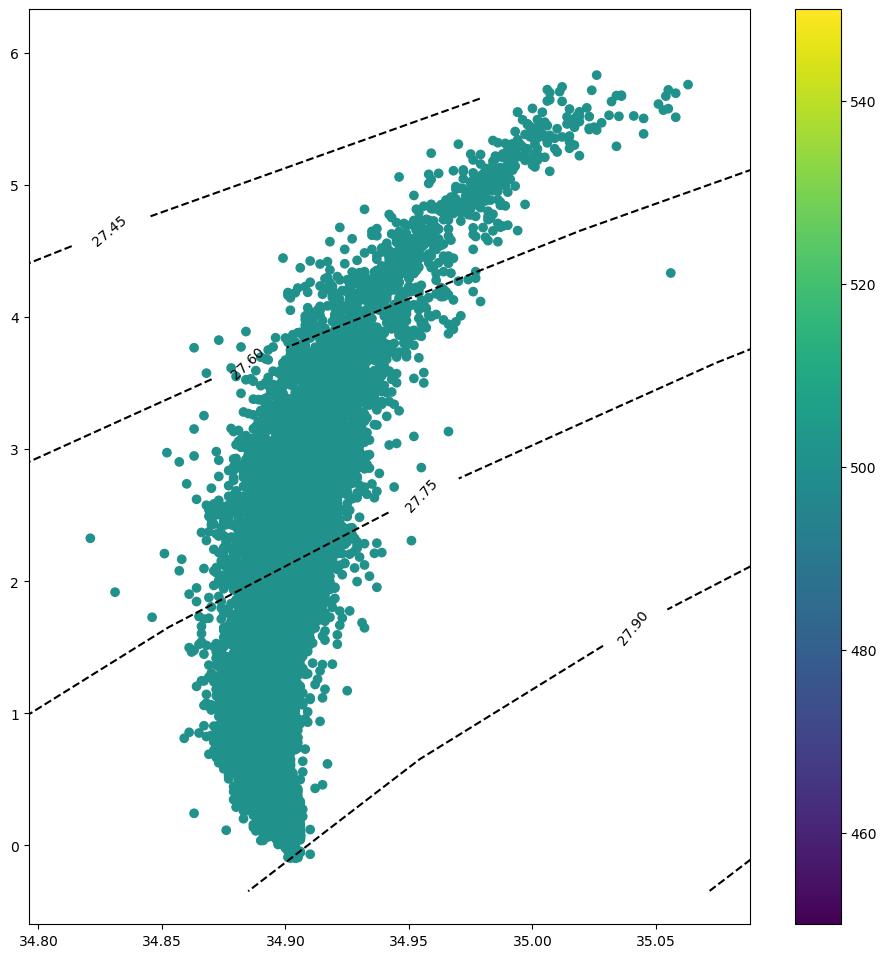

In [115]:
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
fig.tight_layout(pad = 2)
im = ax.scatter(data_500m["PSAL_FILTER"], data_500m["TEMP_FILTER"], c =  data_500m["DEPTH"])
#im = ax.scatter(data_800m["PSAL_FILTER"], data_800m["TEMP_FILTER"], c =  data_800m["DEPTH"])
plt.colorbar(im)

tmin = np.nanmin(data_500m["TEMP_FILTER"].values)
tmax = np.nanmax(data_500m["TEMP_FILTER"].values)
smin = np.nanmin(data_500m["PSAL_FILTER"].values)
smax = np.nanmax(data_500m["PSAL_FILTER"].values)
    
ydim = int(round(((tmax +0.25) - (tmin-0.25))+1,0))
xdim = int(round(( (smax +0.25) - (smin-0.25))/0.1+1,0))
ti = np.linspace(0,ydim-1,ydim)+tmin-0.25
si = np.linspace(1,xdim-1,xdim)*0.1+smin-0.25

density = np.zeros((ydim,xdim))
for j in range(0, int(ydim)):
    for i in range(0, int(xdim)):
        density[j,i] = gsw.density.rho(si[i],ti[j], 0)
density = density - 1000

CS = ax.contour(si,ti,density, linestyles='dashed', colors='black')
ax.clabel(CS, inline=1, fontsize=10)

ax.set_xlim([smin - 0.025 , smax + 0.025 ])
ax.set_ylim([tmin -0.5, tmax + 0.5])

(-1.0659999999999998, 5.951)

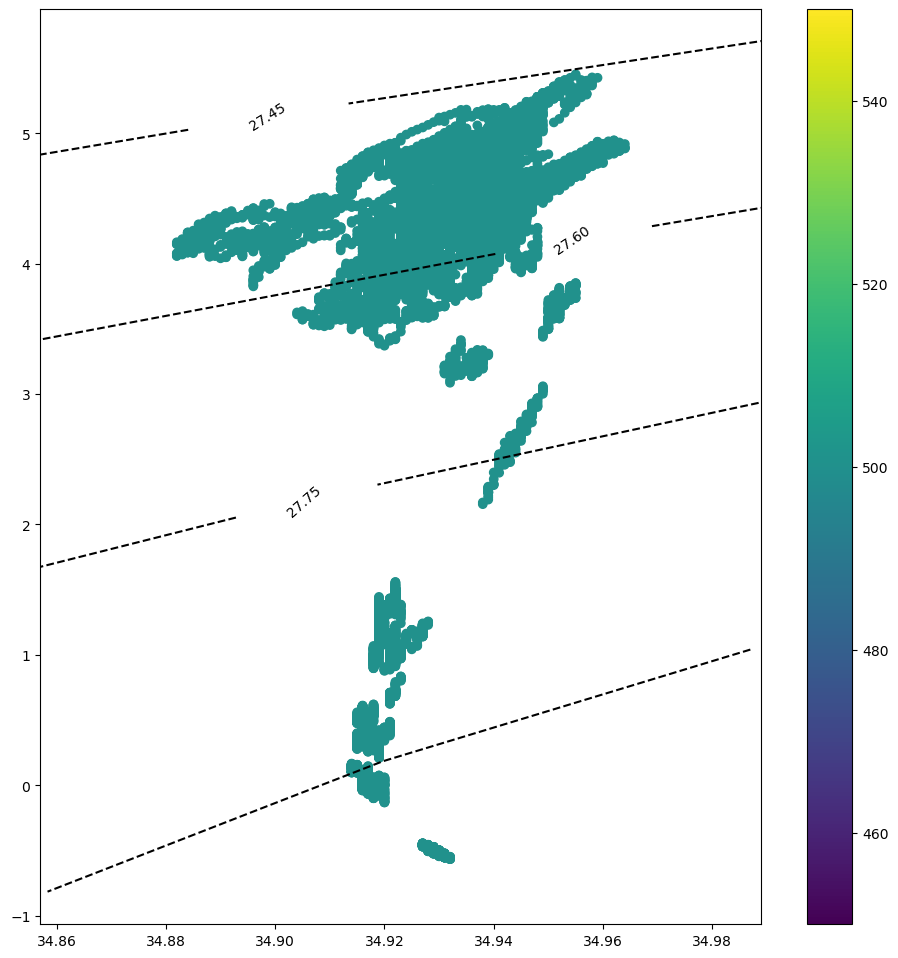

In [113]:
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
fig.tight_layout(pad = 2)
im = ax.scatter(data_500m["SALT_MOD"], data_500m["TEMP_MOD"], c =  data_500m["DEPTH"])
plt.colorbar(im)

tmin = np.nanmin(data_500m["TEMP_MOD"].values)
tmax = np.nanmax(data_500m["TEMP_MOD"].values)
smin = np.nanmin(data_500m["SALT_MOD"].values)
smax = np.nanmax(data_500m["SALT_MOD"].values)
    
ydim = int(round(((tmax +0.25) - (tmin-0.25))+1,0))
xdim = int(round(( (smax +0.25) - (smin-0.25))/0.1+1,0))
ti = np.linspace(0,ydim-1,ydim)+tmin-0.25
si = np.linspace(1,xdim-1,xdim)*0.1+smin-0.25

density = np.zeros((ydim,xdim))
for j in range(0, int(ydim)):
    for i in range(0, int(xdim)):
        density[j,i] = gsw.density.rho(si[i],ti[j], 0)
density = density - 1000

CS = ax.contour(si,ti,density, linestyles='dashed', colors='black')
ax.clabel(CS, inline=1, fontsize=10)

ax.set_xlim([smin - 0.025 , smax + 0.025 ])
ax.set_ylim([tmin -0.5, tmax + 0.5])

Finner RMSE for de forskjellige dypene for temperatur og salinitet

In [15]:
def find_rmse(observational_data, model_data):      
    # Funksjon som regner rmse
    return np.sqrt(np.mean(observational_data - model_data)**2)


def find_bias(observational_data, model_data):      
    # Funksjon som finner bias-et mellom modellen og observasjonen 
    return np.mean(observational_data - model_data)


def find_SD(observational_data, model_data):        
    # Funkjson som regner ut standardavviket mellom model og observasjonene
    return np.std(model_data) - np.std(observational_data)


In [16]:
# BIAS for temperatur og salt 
# 500m 
bias_500_first_period_temp  = find_bias(data_500m["TEMP_FILTER"].loc[0:8140], data_500m["TEMP_MOD"].loc[0:8140])
bias_500_last_period_temp   = find_bias(data_500m["TEMP_FILTER"].loc[8140::], data_500m["TEMP_MOD"].loc[8140::])
bias_500_first_period_sal   = find_bias(data_500m["PSAL_FILTER"].loc[0:8140], data_500m["SALT_MOD"].loc[0:8140])
bias_500_last_period_sal    = find_bias(data_500m["PSAL_FILTER"].loc[8140::], data_500m["SALT_MOD"].loc[8140::])

# 800m
bias_800_first_period_temp  = find_bias(data_800m["TEMP_FILTER"].loc[0:8140], data_800m["TEMP_MOD"].loc[0:8140])
bias_800_last_period_temp   = find_bias(data_800m["TEMP_FILTER"].loc[8140::], data_800m["TEMP_MOD"].loc[8140::])
bias_800_first_period_sal   = find_bias(data_800m["PSAL_FILTER"].loc[0:8140], data_800m["SALT_MOD"].loc[0:8140])
bias_800_last_period_sal    = find_bias(data_800m["PSAL_FILTER"].loc[8140::], data_800m["SALT_MOD"].loc[8140::])

# 1000m 
bias_1000_first_period_temp = find_bias(data_1000m["TEMP_FILTER"].loc[0:8140], data_1000m["TEMP_MOD"].loc[0:8140])
bias_1000_last_period_temp  = find_bias(data_1000m["TEMP_FILTER"].loc[8140::], data_1000m["TEMP_MOD"].loc[8140::])
bias_1000_first_period_sal  = find_bias(data_1000m["PSAL_FILTER"].loc[0:8140], data_1000m["SALT_MOD"].loc[0:8140])
bias_1000_last_period_sal   = find_bias(data_1000m["PSAL_FILTER"].loc[8140::], data_1000m["SALT_MOD"].loc[8140::])

# 1200m 
bias_1200_first_period_temp = find_bias(data_1200m["TEMP_FILTER"].loc[0:8140], data_1200m["TEMP_MOD"].loc[0:8140])
bias_1200_last_period_temp = find_bias(data_1200m["TEMP_FILTER"].loc[8140::], data_1200m["TEMP_MOD"].loc[8140::])
bias_1200_first_period_sal = find_bias(data_1200m["PSAL_FILTER"].loc[0:8140], data_1200m["SALT_MOD"].loc[0:8140])
bias_1200_last_period_sal = find_bias(data_1200m["PSAL_FILTER"].loc[8140::], data_1200m["SALT_MOD"].loc[8140::])

# 2000m (Problem -ingen av observasjonsveridene har god nok kvalitet)
bias_2000_first_period_temp = find_bias(data_2000m["TEMP_FILTER"].loc[0:8140], data_2000m["TEMP_MOD"].loc[0:8140])
bias_2000_last_period_temp = find_bias(data_2000m["TEMP_FILTER"].loc[8140::], data_2000m["TEMP_MOD"].loc[8140::])
bias_2000_first_period_sal = find_bias(data_2000m["PSAL_FILTER"].loc[0:8140], data_2000m["SALT_MOD"].loc[0:8140])
bias_2000_last_period_sal = find_bias(data_2000m["PSAL_FILTER"].loc[8140::], data_2000m["SALT_MOD"].loc[8140::])

In [17]:
# Printer verdiene 
print(f'CALCULATED BIAS')
print(f'                        *******  500m  *******')
print(f"___Temperature___                       ___Salinitet___")
print(f"Før modelendring:       {bias_500_first_period_temp:.5f}        Før modelendring:       {bias_500_first_period_sal:.5f}")
print(f"Etter modelendring:     {bias_500_last_period_temp:.5f}        Etter modelendring:     {bias_500_last_period_sal:.5f}")


print("")
print("")
print(f'                        *******  800m  *******')
print(f"___Temperature___                       ___Salinitet___")
print(f"Før modelendring:       {bias_800_first_period_temp:.5f}        Før modelendring:       {bias_800_first_period_sal:.5f}")
print(f"Etter modelendring:     {bias_800_last_period_temp:.5f}        Etter modelendring:     {bias_800_last_period_sal:.5f}")

print("")
print("")
print(f'                        *******  1000m  *******')
print(f"___Temperature___                       ___Salinitet___")
print(f"Før modelendring:       {bias_1000_first_period_temp:.5f}        Før modelendring:       {bias_1000_first_period_sal:.5f}")
print(f"Etter modelendring:     {bias_1000_last_period_temp:.5f}        Etter modelendring:     {bias_1000_last_period_sal:.5f}")

print("")
print("")
print(f'                        *******  1200m  *******')
print(f"___Temperature___                       ___Salinitet___")
print(f"Før modelendring:       {bias_1200_first_period_temp:.5f}        Før modelendring:       {bias_1200_first_period_sal:.5f}")
print(f"Etter modelendring:     {bias_1200_last_period_temp:.5f}        Etter modelendring:     {bias_1200_last_period_sal:.5f}")

print("")
print("")
print(f'                        *******  2000m  *******')
print(f"___Temperature___                       ___Salinitet___")
print(f"Før modelendring:       {bias_2000_first_period_temp:.5f}        Før modelendring:       {bias_2000_first_period_sal:.5f}")
print(f"Etter modelendring:     {bias_2000_last_period_temp:.5f}        Etter modelendring:     {bias_2000_last_period_sal:.5f}")


# Ser ut som om at for temperatur så øker biaset etter modelendringen, mens for salinitetsdataen så blir den mindre. 

CALCULATED BIAS
                        *******  500m  *******
___Temperature___                       ___Salinitet___
Før modelendring:       0.76265        Før modelendring:       -0.02957
Etter modelendring:     -3.27891        Etter modelendring:     -0.03111


                        *******  800m  *******
___Temperature___                       ___Salinitet___
Før modelendring:       -1.10790        Før modelendring:       -0.01296
Etter modelendring:     -1.56295        Etter modelendring:     -0.03507


                        *******  1000m  *******
___Temperature___                       ___Salinitet___
Før modelendring:       -1.34690        Før modelendring:       -0.01124
Etter modelendring:     -0.91395        Etter modelendring:     -0.00343


                        *******  1200m  *******
___Temperature___                       ___Salinitet___
Før modelendring:       -1.51648        Før modelendring:       -0.00866
Etter modelendring:     -0.64971        Etter modelend

In [18]:
# SD for temperatur og salt 
# 500m 
SD_500_first_period_temp  = find_SD(data_500m["TEMP_FILTER"].loc[0:8140], data_500m["TEMP_MOD"].loc[0:8140])
SD_500_last_period_temp   = find_SD(data_500m["TEMP_FILTER"].loc[8140::], data_500m["TEMP_MOD"].loc[8140::])
SD_500_first_period_sal   = find_SD(data_500m["PSAL_FILTER"].loc[0:8140], data_500m["SALT_MOD"].loc[0:8140])
SD_500_last_period_sal    = find_SD(data_500m["PSAL_FILTER"].loc[8140::], data_500m["SALT_MOD"].loc[8140::])

# 800m
SD_800_first_period_temp  = find_SD(data_800m["TEMP_FILTER"].loc[0:8140], data_800m["TEMP_MOD"].loc[0:8140])
SD_800_last_period_temp   = find_SD(data_800m["TEMP_FILTER"].loc[8140::], data_800m["TEMP_MOD"].loc[8140::])
SD_800_first_period_sal   = find_SD(data_800m["PSAL_FILTER"].loc[0:8140], data_800m["SALT_MOD"].loc[0:8140])
SD_800_last_period_sal    = find_SD(data_800m["PSAL_FILTER"].loc[8140::], data_800m["SALT_MOD"].loc[8140::])

# 1000m 
SD_1000_first_period_temp = find_SD(data_1000m["TEMP_FILTER"].loc[0:8140], data_1000m["TEMP_MOD"].loc[0:8140])
SD_1000_last_period_temp  = find_SD(data_1000m["TEMP_FILTER"].loc[8140::], data_1000m["TEMP_MOD"].loc[8140::])
SD_1000_first_period_sal  = find_SD(data_1000m["PSAL_FILTER"].loc[0:8140], data_1000m["SALT_MOD"].loc[0:8140])
SD_1000_last_period_sal   = find_SD(data_1000m["PSAL_FILTER"].loc[8140::], data_1000m["SALT_MOD"].loc[8140::])

# 1200m 
SD_1200_first_period_temp = find_SD(data_1200m["TEMP_FILTER"].loc[0:8140], data_1200m["TEMP_MOD"].loc[0:8140])
SD_1200_last_period_temp = find_SD(data_1200m["TEMP_FILTER"].loc[8140::], data_1200m["TEMP_MOD"].loc[8140::])
SD_1200_first_period_sal = find_SD(data_1200m["PSAL_FILTER"].loc[0:8140], data_1200m["SALT_MOD"].loc[0:8140])
SD_1200_last_period_sal = find_SD(data_1200m["PSAL_FILTER"].loc[8140::], data_1200m["SALT_MOD"].loc[8140::])

# 2000m (Problem -ingen av observasjonsveridene har god nok kvalitet)
SD_2000_first_period_temp = find_SD(data_2000m["TEMP_FILTER"].loc[0:8140], data_2000m["TEMP_MOD"].loc[0:8140])
SD_2000_last_period_temp = find_SD(data_2000m["TEMP_FILTER"].loc[8140::], data_2000m["TEMP_MOD"].loc[8140::])
SD_2000_first_period_sal = find_SD(data_2000m["PSAL_FILTER"].loc[0:8140], data_2000m["SALT_MOD"].loc[0:8140])
SD_2000_last_period_sal = find_SD(data_2000m["PSAL_FILTER"].loc[8140::], data_2000m["SALT_MOD"].loc[8140::])

In [19]:
std_sal_500 = np.std( data_500m["SALT_MOD"].loc[0:8140]) - np.std(data_500m["PSAL_FILTER"].loc[0:8140])
std_sal_500_after = np.std(data_500m["SALT_MOD"].loc[8140::]) - np.std(data_500m["PSAL_FILTER"].loc[8140::])
print(std_sal_500)
print(std_sal_500_after)


-0.009184137449902551
-0.0005863496229694971


In [20]:
# Printer verdiene
print(f"SD")
print(f'                        *******  500m  *******')
print(f"___Temperature___                       ___Salinitet___")
print(f"Før modelendring:       {SD_500_first_period_temp:.5f}        Før modelendring:       {SD_500_first_period_sal:.5f}")
print(f"Etter modelendring:     {SD_500_last_period_temp:.5f}        Etter modelendring:     {SD_500_last_period_sal:.5f}")


print("")
print("")
print(f'                        *******  800m  *******')
print(f"___Temperature___                       ___Salinitet___")
print(f"Før modelendring:       {SD_800_first_period_temp:.5f}        Før modelendring:       {SD_800_first_period_sal:.5f}")
print(f"Etter modelendring:     {SD_800_last_period_temp:.5f}        Etter modelendring:     {SD_800_last_period_sal:.5f}")

print("")
print("")
print(f'                        *******  1000m  *******')
print(f"___Temperature___                       ___Salinitet___")
print(f"Før modelendring:       {SD_1000_first_period_temp:.5f}        Før modelendring:       {SD_1000_first_period_sal:.5f}")
print(f"Etter modelendring:     {SD_1000_last_period_temp:.5f}        Etter modelendring:     {SD_1000_last_period_sal:.5f}")

print("")
print("")
print(f'                        *******  1200m  *******')
print(f"___Temperature___                       ___Salinitet___")
print(f"Før modelendring:       {SD_1200_first_period_temp:.5f}        Før modelendring:       {SD_1200_first_period_sal:.5f}")
print(f"Etter modelendring:     {SD_1200_last_period_temp:.5f}        Etter modelendring:     {SD_1200_last_period_sal:.5f}")

print("")
print("")
print(f'                        *******  2000m  *******')
print(f"___Temperature___                       ___Salinitet___")
print(f"Før modelendring:       {SD_2000_first_period_temp:.5f}        Før modelendring:       {SD_2000_first_period_sal:.5f}")
print(f"Etter modelendring:     {SD_2000_last_period_temp:.5f}        Etter modelendring:     {SD_2000_last_period_sal:.5f}")


SD
                        *******  500m  *******
___Temperature___                       ___Salinitet___
Før modelendring:       0.37480        Før modelendring:       -0.00918
Etter modelendring:     -0.76857        Etter modelendring:     -0.00059


                        *******  800m  *******
___Temperature___                       ___Salinitet___
Før modelendring:       1.43731        Før modelendring:       0.00656
Etter modelendring:     0.18229        Etter modelendring:     -0.11957


                        *******  1000m  *******
___Temperature___                       ___Salinitet___
Før modelendring:       1.49784        Før modelendring:       0.00813
Etter modelendring:     0.10170        Etter modelendring:     0.00112


                        *******  1200m  *******
___Temperature___                       ___Salinitet___
Før modelendring:       1.54358        Før modelendring:       0.00423
Etter modelendring:     0.03266        Etter modelendring:     -0.00499


  

In [21]:
# RMSE for temperatur og salt 
# RMSE for temperatur og salt 
# 500m 
rmse_500_first_period_temp  = find_rmse(data_500m["TEMP_FILTER"].loc[0:8140], data_500m["TEMP_MOD"].loc[0:8140])
rmse_500_last_period_temp   = find_rmse(data_500m["TEMP_FILTER"].loc[8140::], data_500m["TEMP_MOD"].loc[8140::])
rmse_500_first_period_sal   = find_rmse(data_500m["PSAL_FILTER"].loc[0:8140], data_500m["SALT_MOD"].loc[0:8140])
rmse_500_last_period_sal    = find_rmse(data_500m["PSAL_FILTER"].loc[8140::], data_500m["SALT_MOD"].loc[8140::])

# 800m
rmse_800_first_period_temp  = find_rmse(data_800m["TEMP_FILTER"].loc[0:8140], data_800m["TEMP_MOD"].loc[0:8140])
rmse_800_last_period_temp   = find_rmse(data_800m["TEMP_FILTER"].loc[8140::], data_800m["TEMP_MOD"].loc[8140::])
rmse_800_first_period_sal   = find_rmse(data_800m["PSAL_FILTER"].loc[0:8140], data_800m["SALT_MOD"].loc[0:8140])
rmse_800_last_period_sal    = find_rmse(data_800m["PSAL_FILTER"].loc[8140::], data_800m["SALT_MOD"].loc[8140::])

# 1000m 
rmse_1000_first_period_temp = find_rmse(data_1000m["TEMP_FILTER"].loc[0:8140], data_1000m["TEMP_MOD"].loc[0:8140])
rmse_1000_last_period_temp  = find_rmse(data_1000m["TEMP_FILTER"].loc[8140::], data_1000m["TEMP_MOD"].loc[8140::])
rmse_1000_first_period_sal  = find_rmse(data_1000m["PSAL_FILTER"].loc[0:8140], data_1000m["SALT_MOD"].loc[0:8140])
rmse_1000_last_period_sal   = find_rmse(data_1000m["PSAL_FILTER"].loc[8140::], data_1000m["SALT_MOD"].loc[8140::])

# 1200m 
rmse_1200_first_period_temp = find_rmse(data_1200m["TEMP_FILTER"].loc[0:8140], data_1200m["TEMP_MOD"].loc[0:8140])
rmse_1200_last_period_temp = find_rmse(data_1200m["TEMP_FILTER"].loc[8140::], data_1200m["TEMP_MOD"].loc[8140::])
rmse_1200_first_period_sal = find_rmse(data_1200m["PSAL_FILTER"].loc[0:8140], data_1200m["SALT_MOD"].loc[0:8140])
rmse_1200_last_period_sal = find_rmse(data_1200m["PSAL_FILTER"].loc[8140::], data_1200m["SALT_MOD"].loc[8140::])

# 2000m (Problem -ingen av observasjonsveridene har god nok kvalitet)
rmse_2000_first_period_temp = find_rmse(data_2000m["TEMP_FILTER"].loc[0:8140], data_2000m["TEMP_MOD"].loc[0:8140])
rmse_2000_last_period_temp = find_rmse(data_2000m["TEMP_FILTER"].loc[8140::], data_2000m["TEMP_MOD"].loc[8140::])
rmse_2000_first_period_sal = find_rmse(data_2000m["PSAL_FILTER"].loc[0:8140], data_2000m["SALT_MOD"].loc[0:8140])
rmse_2000_last_period_sal = find_rmse(data_2000m["PSAL_FILTER"].loc[8140::], data_2000m["SALT_MOD"].loc[8140::])




In [22]:
# Printer verdiene
print(f"RMSE")
print(f'                        *******  500m  *******')
print(f"___Temperature___                       ___Salinitet___")
print(f"Før modelendring:       {rmse_500_first_period_temp:.5f}        Før modelendring:       {rmse_500_first_period_sal:.5f}")
print(f"Etter modelendring:     {rmse_500_last_period_temp:.5f}        Etter modelendring:     {rmse_500_last_period_sal:.5f}")


print("")
print("")
print(f'                        *******  800m  *******')
print(f"___Temperature___                       ___Salinitet___")
print(f"Før modelendring:       {rmse_800_first_period_temp:.5f}        Før modelendring:       {rmse_800_first_period_sal:.5f}")
print(f"Etter modelendring:     {rmse_800_last_period_temp:.5f}        Etter modelendring:     {rmse_800_last_period_sal:.5f}")

print("")
print("")
print(f'                        *******  1000m  *******')
print(f"___Temperature___                       ___Salinitet___")
print(f"Før modelendring:       {rmse_1000_first_period_temp:.5f}        Før modelendring:       {rmse_1000_first_period_sal:.5f}")
print(f"Etter modelendring:     {rmse_1000_last_period_temp:.5f}        Etter modelendring:     {rmse_1000_last_period_sal:.5f}")

print("")
print("")
print(f'                        *******  1200m  *******')
print(f"___Temperature___                       ___Salinitet___")
print(f"Før modelendring:       {rmse_1200_first_period_temp:.5f}        Før modelendring:       {rmse_1200_first_period_sal:.5f}")
print(f"Etter modelendring:     {rmse_1200_last_period_temp:.5f}        Etter modelendring:     {rmse_1200_last_period_sal:.5f}")

print("")
print("")
print(f'                        *******  2000m  *******')
print(f"___Temperature___                       ___Salinitet___")
print(f"Før modelendring:       {rmse_2000_first_period_temp:.5f}        Før modelendring:       {rmse_2000_first_period_sal:.5f}")
print(f"Etter modelendring:     {rmse_2000_last_period_temp:.5f}        Etter modelendring:     {rmse_2000_last_period_sal:.5f}")


RMSE
                        *******  500m  *******
___Temperature___                       ___Salinitet___
Før modelendring:       0.76265        Før modelendring:       0.02957
Etter modelendring:     3.27891        Etter modelendring:     0.03111


                        *******  800m  *******
___Temperature___                       ___Salinitet___
Før modelendring:       1.10790        Før modelendring:       0.01296
Etter modelendring:     1.56295        Etter modelendring:     0.03507


                        *******  1000m  *******
___Temperature___                       ___Salinitet___
Før modelendring:       1.34690        Før modelendring:       0.01124
Etter modelendring:     0.91395        Etter modelendring:     0.00343


                        *******  1200m  *******
___Temperature___                       ___Salinitet___
Før modelendring:       1.51648        Før modelendring:       0.00866
Etter modelendring:     0.64971        Etter modelendring:     0.00270


     

## Analyse av South Cape mooring or modelldata

In [23]:
data = pd.read_csv("Summer_project_MET_NorEMSO/southcape_data_obs_and_mod.csv")

In [103]:
data.head()

,Unnamed: 0,TIME,ensemble,ErrorFlags,TEMP,Pressure,PSAL,DEPTH,LATITUDE,LONGITUDE,X,Y,DAY,year_month,TEMP_MOD,SALT_MOD
0,0,2022-04-13 07:00:00,4.0,20.0,1.681440,380.477000,35.188080,376.160146,76.107,15.967,292.0,444.0,2022-04-13,2022-04,1.373978,34.863468
1,1,2022-04-13 08:00:00,12.5,20.0,1.754808,380.570583,34.938325,376.252583,76.107,15.967,292.0,444.0,2022-04-13,2022-04,1.382487,34.863429
2,2,2022-04-13 09:00:00,24.5,20.0,1.793025,380.632583,34.864558,376.313823,76.107,15.967,292.0,444.0,2022-04-13,2022-04,1.393375,34.863430
3,3,2022-04-13 10:00:00,36.5,20.0,1.795467,380.610250,34.829108,376.291764,76.107,15.967,292.0,444.0,2022-04-13,2022-04,1.403328,34.863353
4,4,2022-04-13 11:00:00,48.5,20.0,1.784008,380.496000,34.820783,376.178913,76.107,15.967,292.0,444.0,2022-04-13,2022-04,1.410672,34.863067


In [108]:
temp_obs = data["TEMP"][:-7]
temp_mod = data["TEMP_MOD"][:-7]
psal_obs = data["PSAL"][:-7]
psal_mod = data["SALT_MOD"][:-7]
time = data["TIME"][:-7]
depth = data["DEPTH"][:-7]

Ekskluderer de siste 6 timesverdiene denne dataen inneholder målinger fra måleinstrumentene ble heist opp fra havdypet. 

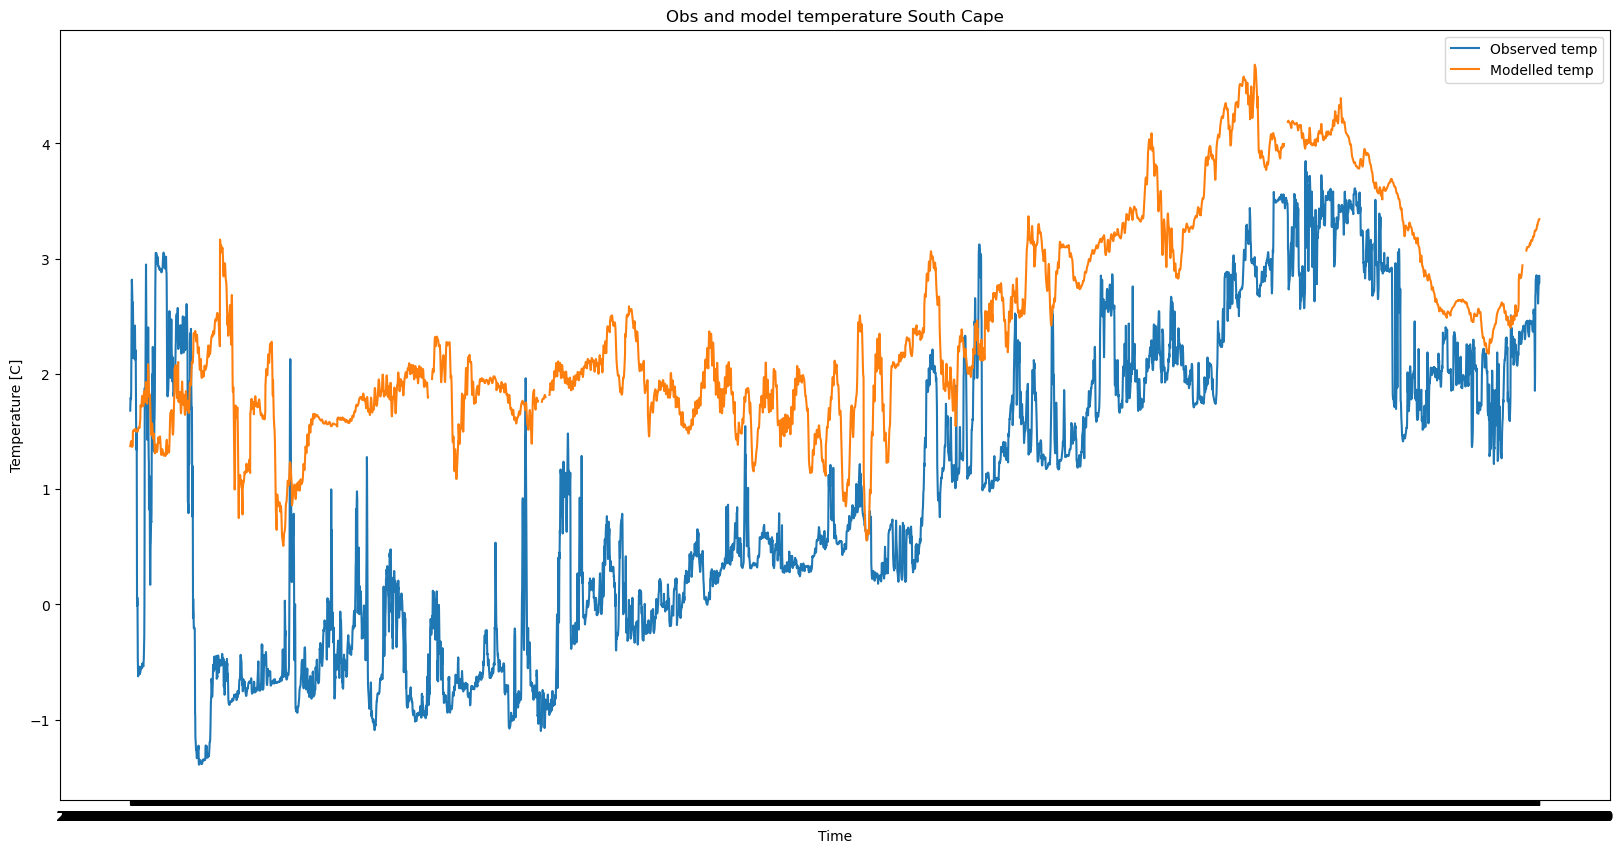

In [101]:
plt.figure(figsize=(20,10))
plt.plot(time, temp_obs, label = "Observed temp")
plt.plot(time, temp_mod, label = "Modelled temp")
plt.title("Obs and model temperature South Cape")
plt.ylabel("Temperature [C]")
plt.xlabel("Time")
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'South Cape mooring observations vs Barents model values: TEMP [C]')

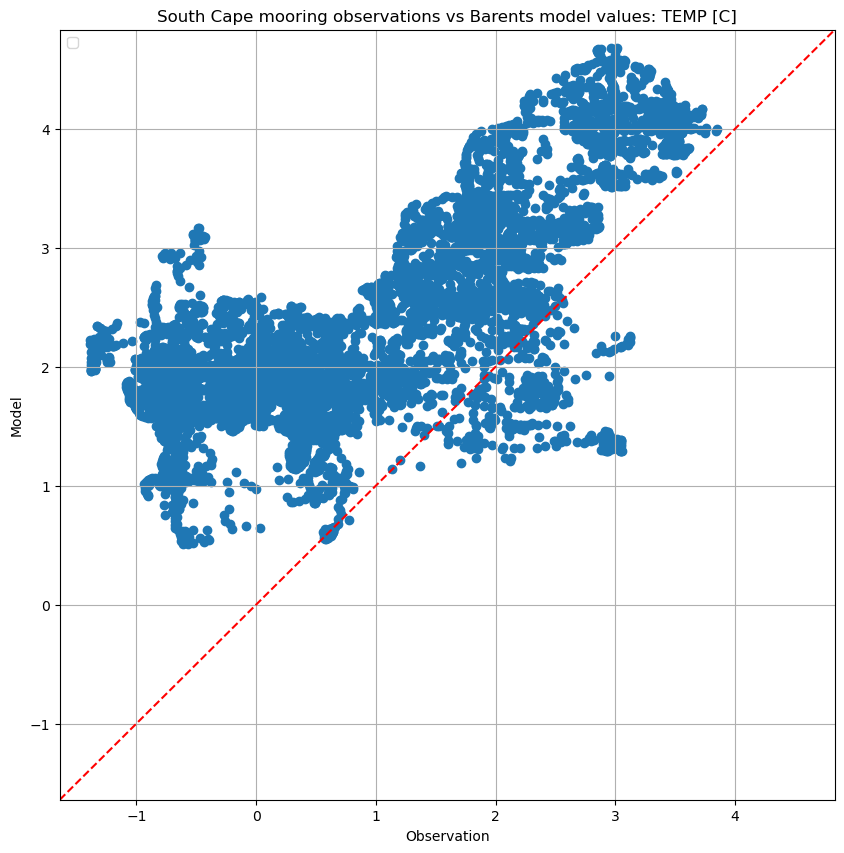

In [78]:
plt.figure(figsize=(10,10))
plt.grid()
plt.scatter(temp_obs, temp_mod)

lims2 = [min(temp_obs)-0.25, max(temp_mod)+0.15]
plt.plot(lims2, lims2, 'r--')
plt.legend()
plt.xlim(min(temp_obs)-0.25,max(temp_mod)+0.15)
plt.ylim(min(temp_obs)-0.25,max(temp_mod)+0.15)
plt.ylabel("Model")
plt.xlabel("Observation")
plt.title("South Cape mooring observations vs Barents model values: TEMP [C]")

(-1.8900416666666666, 4.3467166666666675)

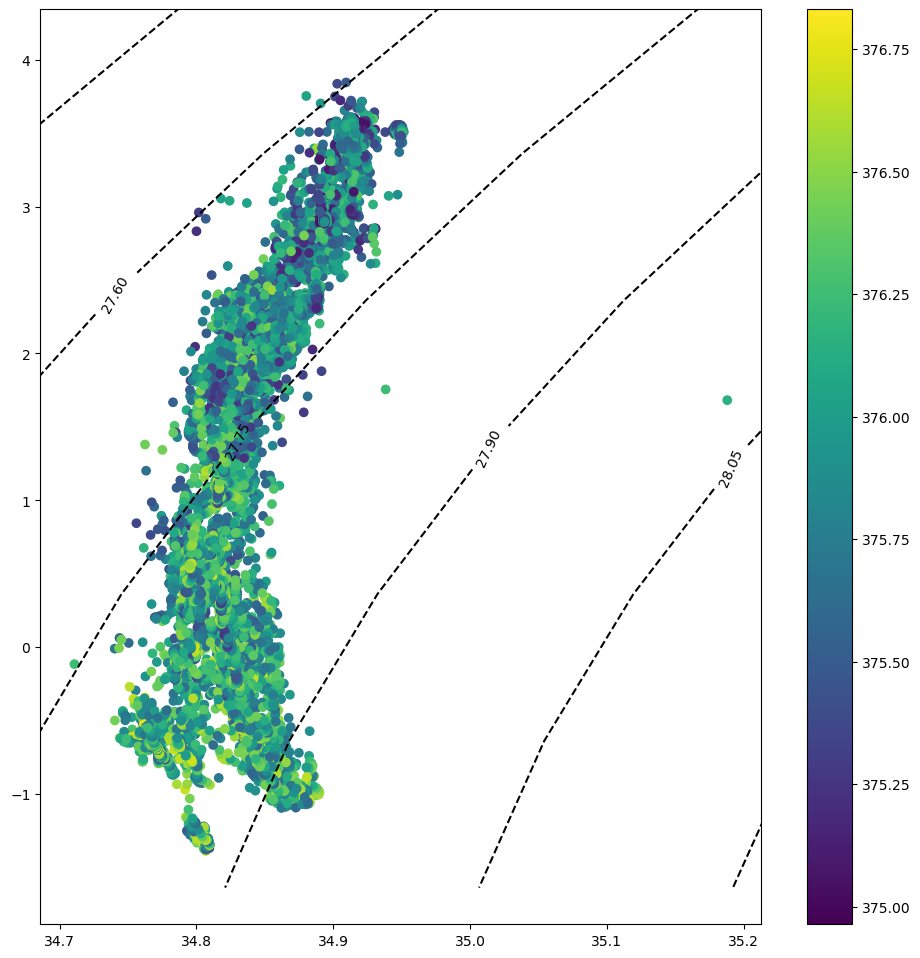

In [109]:
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
fig.tight_layout(pad = 2)
im = ax.scatter(psal_obs, temp_obs,c=depth)
plt.colorbar(im)

tmin = np.nanmin(temp_obs.values)
tmax = np.nanmax(temp_obs.values)
smin = np.nanmin(psal_obs.values)
smax = np.nanmax(psal_obs.values)
    
ydim = int(round(((tmax +0.25) - (tmin-0.25))+1,0))
xdim = int(round(( (smax +0.25) - (smin-0.25))/0.1+1,0))
ti = np.linspace(0,ydim-1,ydim)+tmin-0.25
si = np.linspace(1,xdim-1,xdim)*0.1+smin-0.25

density = np.zeros((ydim,xdim))
for j in range(0, int(ydim)):
    for i in range(0, int(xdim)):
        density[j,i] = gsw.density.rho(si[i],ti[j], 0)
density = density - 1000

CS = ax.contour(si,ti,density, linestyles='dashed', colors='black')
ax.clabel(CS, inline=1, fontsize=10)

ax.set_xlim([smin - 0.025 , smax + 0.025 ])
ax.set_ylim([tmin -0.5, tmax + 0.5])

(0.00821941028014761, 5.182452348760402)

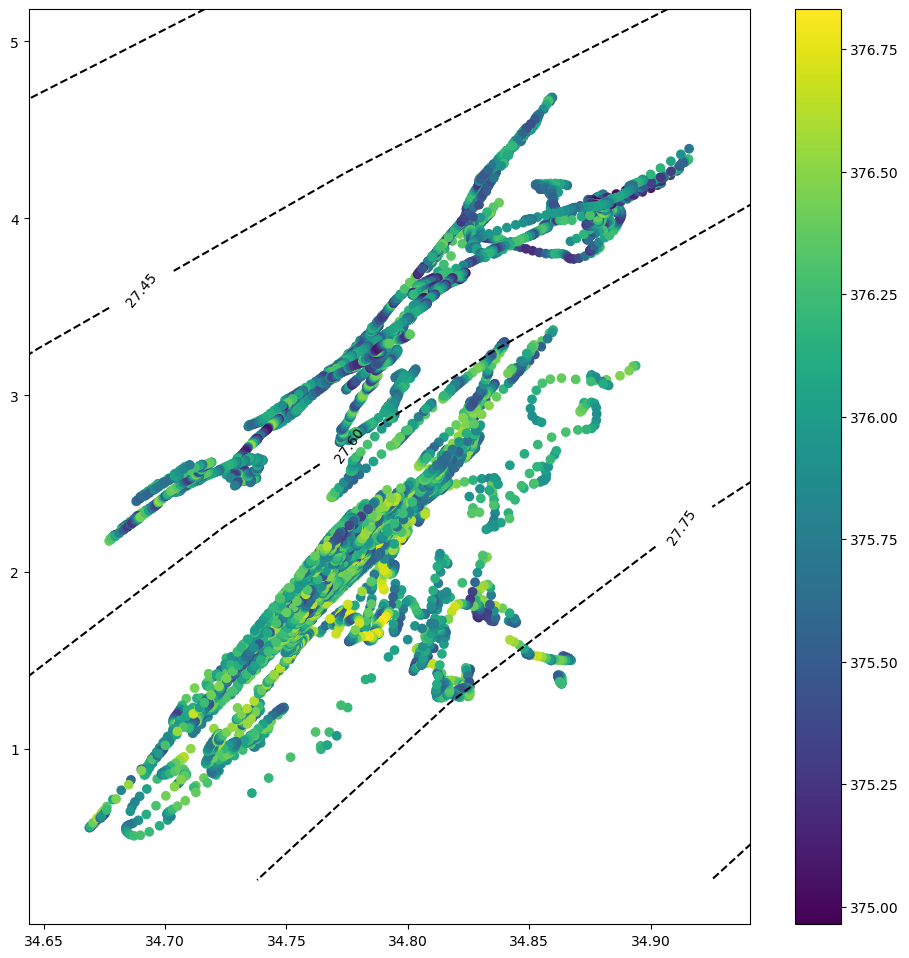

In [110]:
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
fig.tight_layout(pad = 2)
im = ax.scatter(psal_mod, temp_mod,c=depth)
plt.colorbar(im)

tmin = np.nanmin(temp_mod.values)
tmax = np.nanmax(temp_mod.values)
smin = np.nanmin(psal_mod.values)
smax = np.nanmax(psal_mod.values)
    
ydim = int(round(((tmax +0.25) - (tmin-0.25))+1,0))
xdim = int(round(( (smax +0.25) - (smin-0.25))/0.1+1,0))
ti = np.linspace(0,ydim-1,ydim)+tmin-0.25
si = np.linspace(1,xdim-1,xdim)*0.1+smin-0.25

density = np.zeros((ydim,xdim))
for j in range(0, int(ydim)):
    for i in range(0, int(xdim)):
        density[j,i] = gsw.density.rho(si[i],ti[j], 0)
density = density - 1000

CS = ax.contour(si,ti,density, linestyles='dashed', colors='black')
ax.clabel(CS, inline=1, fontsize=10)

ax.set_xlim([smin - 0.025 , smax + 0.025 ])
ax.set_ylim([tmin -0.5, tmax + 0.5])